In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mat73

In [792]:
#Subjects 06, 07, 10, 12, 13, 15, 16,17, 18, 21
setup_path = 'EFRI06_WAR_SES1_Setup.mat'
raw_path = 'EFRI06_WAR_SES1_Raw.mat'
efri_ctrl = np.load('SUBJECT06_control_state.npy')
subj = raw_path.split("Raw")[0]

setup_data = mat73.loadmat(setup_path)
channels = setup_data['elec_name']
efri = np.load(subj+'.npy')[:,:-1]


#Create lists for each subj's .npy name
#Create dataframe for each subject
#Add each subject's control state data to the dataframe
#Do the Spearman correlation for each subject's trials and the cognitive control state trial


In [793]:
#create dataframe. transpose so all the channel data are in columns

efri_set = pd.DataFrame(efri)
efri_set = efri_set.T
efri_set.columns = channels

#add the control state column
efri_set['Control'] = efri_ctrl
# ^ problem with this. control array is 184 values/trials but rest of the channels have 185 values/trials
#efri06_ctrl
#efri06_set.shape


In [794]:
from scipy import stats
import seaborn as sns

#creates list of SpearmanR result objects with attributes correlation and p value < 0.05
efri_spear = [stats.spearmanr(efri_set[i], efri_set['Control']) for i in efri_set.columns]# if stats.spearmanr(efri_set[i], efri_set['Control']).pvalue.all() < 0.05]


## remove the last value because it is control correlating with itself
efri_corrs = [i.correlation for i in efri_spear][:-1]
efri_pval = [i.pvalue for i in efri_spear][:-1]

In [795]:
### Data editing ###
from statsmodels.stats.multitest import fdrcorrection
#efri_pval = np.asarray(efri_pval, dtype=object)
efri_fdrpval = fdrcorrection(efri_pval)[1]

#want corrected values that are < 0.05
#will also exclude regions thate include white matter, out, ventricle
#plot a horizontal bar graph, stacked=True
#pick out a few channels with high correlation and plot control state with max pac values per trial to see how they're correlating
#pick a subject or a few of the significant with highest correlation values

#show examples of comodulogram. lowest control state trial, medium control state trial, highest control state trial
#use same scale for all 3 plots to see how amplitude changes / color scale is different on each plot 

#also worth knowing the x and y coords of the frequencies or high - low frequency values with max pac
#compare consistency amongst different trials / subjects r

In [796]:
efri_set

,B'10,B'9,B'8,B'7,B'6,B'5,B'4,B'3,B'2,B'1,...,X'6,X'5,X'4,X'3,X'2,X'1,REF1,REF2,E,Control
0,0.000500,0.011736,0.055968,0.001059,0.000354,0.000825,0.000321,0.001578,0.005038,0.001312,...,0.003974,0.005170,0.006093,0.005021,0.004478,0.003371,0.000267,0.000926,0.001353,0.821490
1,0.000295,0.000275,0.000216,0.000694,0.000304,0.001126,0.000235,0.000212,0.000232,0.000274,...,0.001235,0.001384,0.001610,0.002333,0.001212,0.001382,0.000145,0.000953,0.001783,0.805553
2,0.000920,0.000258,0.000353,0.000515,0.000317,0.001359,0.000273,0.001831,0.004116,0.000221,...,0.000219,0.002705,0.002192,0.001804,0.001697,0.000327,0.000646,0.000913,0.001713,0.789370
3,0.003230,0.000414,0.002268,0.000690,0.000760,0.000291,0.000617,0.000334,0.000348,0.000323,...,0.000378,0.000357,0.001403,0.002312,0.000342,0.000313,0.000905,0.001190,0.001174,0.773265
4,0.001017,0.001124,0.000825,0.000579,0.000638,0.000551,0.000601,0.000513,0.000503,0.000564,...,0.001034,0.000676,0.000711,0.000528,0.000554,0.000624,0.000939,0.000666,0.001354,0.738785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.000248,0.000299,0.000580,0.000255,0.000246,0.000223,0.001114,0.009384,0.010112,0.000240,...,0.000599,0.000240,0.000339,0.002565,0.000414,0.000539,0.000363,0.000265,0.000667,0.670003
180,0.001887,0.000504,0.000692,0.000258,0.000248,0.000459,0.010757,0.004872,0.002434,0.000576,...,0.000319,0.001059,0.003662,0.003487,0.003797,0.001112,0.000308,0.002104,0.001310,0.672006
181,0.006322,0.005026,0.010985,0.001598,0.009519,0.006899,0.006307,0.011293,0.002133,0.002903,...,0.007777,0.018683,0.023706,0.008081,0.012895,0.002010,0.000201,0.000442,0.001065,0.674028
182,0.013849,0.012914,0.004775,0.002946,0.003177,0.000317,0.000252,0.000786,0.000663,0.000240,...,0.000580,0.000575,0.004190,0.000300,0.000415,0.000270,0.000980,0.000559,0.001004,0.674137


In [797]:
#subj07, do I create a new data set or add rows to master?
#going to append each subject's values to master_set
s7 = pd.DataFrame()
efri_list = [subj.split('_')[0] for i in range(len(setup_data['elec_area']))]
s7['Brain Area'] = setup_data['elec_area']
s7['Channel ID'] = setup_data['elec_name']
s7['Correlation'] = efri_corrs
s7['P-Value'] = efri_fdrpval #we'll want corrected p values later on for calculating
s7['Subject'] = efri_list

In [798]:
s7

,Brain Area,Channel ID,Correlation,P-Value,Subject
0,middle temporal gyrus L,B'10,0.036073,0.771395,EFRI06
1,middle temporal gyrus L,B'9,-0.005168,0.944487,EFRI06
2,middle temporal gyrus L,B'8,-0.035517,0.771395,EFRI06
3,white matter,B'7,-0.174441,0.094795,EFRI06
4,white matter,B'6,-0.063998,0.629468,EFRI06
...,...,...,...,...,...
128,cingulate cortex (posterior) L,X'2,0.146175,0.168107,EFRI06
129,cingulate cortex (posterior) L,X'1,0.142089,0.168107,EFRI06
130,FZ,REF1,-0.251349,0.012816,EFRI06
131,CZ,REF2,0.225355,0.027932,EFRI06


In [619]:
#for subj06 I have: their data set and correlation, their channel IDs and channel brain areas
#master_set = pd.DataFrame()
#master_set['Brain Area'] = setup_data['elec_area']
#master_set['Channel ID'] = setup_data['elec_name']
#master_set['Correlation'] = efri06_corrs
#master_set['P-Value'] = efri06_fdrpval #we'll want corrected p values later on for calculating
#master_set['Subject'] = subject_list
#eventually want to get rid of all brain reas that are white matter and the other values

#append to new master set
master_set.append(s7)

/var/folders/9l/s1kv73yx50lff1kywpjgvlgr0000gn/T/ipykernel_32597/3275774384.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_set.append(s7)


,Brain Area,Channel ID,Correlation,P-Value,Subject
0,middle temporal gyrus L,B'10,0.036073,0.771395,EFRI06
1,middle temporal gyrus L,B'9,-0.005168,0.944487,EFRI06
2,middle temporal gyrus L,B'8,-0.035517,0.771395,EFRI06
3,white matter,B'7,-0.174441,0.094795,EFRI06
4,white matter,B'6,-0.063998,0.629468,EFRI06
...,...,...,...,...,...
156,paracentral lobule L,S'2,0.093042,0.311523,EFRI21
157,paracentral lobule L,S'1,-0.051701,0.558858,EFRI21
158,FZ,FZ,-0.114682,0.215056,EFRI21
159,CZ,CZ,-0.138447,0.161187,EFRI21


In [620]:
master_set = master_set.append(s7)

/var/folders/9l/s1kv73yx50lff1kywpjgvlgr0000gn/T/ipykernel_32597/920745294.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_set = master_set.append(s7)


In [621]:
master_set

,Brain Area,Channel ID,Correlation,P-Value,Subject
0,middle temporal gyrus L,B'10,0.036073,0.771395,EFRI06
1,middle temporal gyrus L,B'9,-0.005168,0.944487,EFRI06
2,middle temporal gyrus L,B'8,-0.035517,0.771395,EFRI06
3,white matter,B'7,-0.174441,0.094795,EFRI06
4,white matter,B'6,-0.063998,0.629468,EFRI06
...,...,...,...,...,...
156,paracentral lobule L,S'2,0.093042,0.311523,EFRI21
157,paracentral lobule L,S'1,-0.051701,0.558858,EFRI21
158,FZ,FZ,-0.114682,0.215056,EFRI21
159,CZ,CZ,-0.138447,0.161187,EFRI21


In [622]:
master_set['Subject'].unique()

array(['EFRI06', 'EFRI07', 'EFRI10', 'EFRI12', 'EFRI13', 'EFRI15',
       'EFRI16', 'EFRI17', 'EFRI18', 'EFRI21'], dtype=object)

In [775]:
#master_set corrected is the data values for P val < 0.05, and excluding certain brain regions
#want to count for each brain region, how many subjects had it?
master_corr = master_set[master_set['P-Value'] < 0.05]
master_corr = master_corr[master_corr['Brain Area'] != 'out'] #or  or master_set['Brain Area'] != 'white matter'
master_corr = master_corr[master_corr['Brain Area'] != 'ventricle']
master_corr = master_corr[master_corr['Brain Area'] != 'white matter']
master_corr = master_corr[master_corr['Brain Area'] != 'PZ']
master_corr = master_corr[master_corr['Brain Area'] != 'CZ']
master_corr = master_corr[master_corr['Brain Area'] != 'ventricle L']
master_corr = master_corr[master_corr['Brain Area'] != 'FZ']







master_bregions = master_set[master_set['Brain Area'] != 'out']
master_bregions = master_bregions[master_bregions['Brain Area'] != 'ventricle']
master_bregions = master_bregions[master_bregions['Brain Area'] != 'white matter']

print(len(master_corr['Brain Area'].unique()))

print(len(master_bregions['Brain Area'].unique()))

19
112


In [776]:
#graph the horizontal bar graph for total # of subject with electrode in region
sig_regions = master_corr['Brain Area'].value_counts().index.tolist()
sig_region_ct = master_corr['Brain Area'].value_counts()

#master_set['Brain Area'][regions in master_set['Brain Area']]
#get the nonsig regions that are p val > 0.05
master_bregions2 = master_set[master_set['Brain Area'].isin(sig_regions)] 
master_corr2 = master_bregions2[master_bregions2['P-Value'] > 0.05]
nonsig_regions = master_corr2['Brain Area'].value_counts().index.tolist()
nonsig_region_ct = master_corr2['Brain Area'].value_counts()


In [788]:
master_corr

,Brain Area,Channel ID,Correlation,P-Value,Subject
12,middle temporal gyrus L,C'8,0.204070,0.048409,EFRI06
52,middle temporal gyrus L,I'8,0.256362,0.011801,EFRI06
53,middle temporal gyrus L,I'7,0.216282,0.035360,EFRI06
58,temporal pole L,I'2,0.241034,0.016305,EFRI06
59,temporal pole L,I'1,0.210682,0.041366,EFRI06
81,inferior parietal lobule L,P'9,0.209293,0.041366,EFRI06
104,postcentral gyrus L,S'6,0.233423,0.021106,EFRI06
120,supramarginal gyrus L,X'10,0.259720,0.011801,EFRI06
68,parietal operculum R,S2,-0.287338,0.027077,EFRI12
3,middle temporal gyrus R,I7,-0.224134,0.045854,EFRI16


In [777]:
# to get # of subjects that had significance for that brain region, do I do master_corr['Subject'].unique() for each brain region?
sig_dict = {}
for i in master_corr['Brain Area'].unique():
    temp = master_corr[master_corr['Brain Area'] == i]
    sig_dict[i] = [len(temp['Subject'].unique())]
#print(sig_dict)


{'middle temporal gyrus L': [2], 'temporal pole L': [1], 'inferior parietal lobule L': [1], 'postcentral gyrus L': [2], 'supramarginal gyrus L': [2], 'parietal operculum R': [1], 'middle temporal gyrus R': [1], 'nodule': [1], 'angular gyrus R': [1], 'occipital gyrus L': [1], 'middle frontal gyrus L': [1], 'superior frontal gyrus L': [1], 'inferior frontal gyrus (pars triangularis) L': [1], 'parietal operculum L': [1], 'amygdala L': [1], 'hippocampus (posterior) L': [1], 'fusiform gyrus L': [1], 'angular gyrus (dorsal) L': [1], 'precuneus L': [1]}


In [778]:
# to get # of subjects that had significance for that brain region, do I do master_corr['Subject'].unique() for each brain region?
for k in master_corr2['Brain Area'].unique():
    temp2 = master_corr2[master_corr2['Brain Area'] == k]
    sig_dict[k].append(len(temp2['Subject'].unique()))

#align the two values


In [779]:
sig_dict

{'middle temporal gyrus L': [2, 6],
 'temporal pole L': [1, 3],
 'inferior parietal lobule L': [1, 3],
 'postcentral gyrus L': [2, 1],
 'supramarginal gyrus L': [2, 5],
 'parietal operculum R': [1, 2],
 'middle temporal gyrus R': [1, 5],
 'nodule': [1, 1],
 'angular gyrus R': [1, 5],
 'occipital gyrus L': [1, 3],
 'middle frontal gyrus L': [1, 3],
 'superior frontal gyrus L': [1, 2],
 'inferior frontal gyrus (pars triangularis) L': [1, 2],
 'parietal operculum L': [1, 3],
 'amygdala L': [1, 2],
 'hippocampus (posterior) L': [1, 5],
 'fusiform gyrus L': [1, 5],
 'angular gyrus (dorsal) L': [1, 1],
 'precuneus L': [1, 4]}

In [780]:
tp = list(sig_dict.values())
sig_ct = []
nonsig_ct = []
for i in tp:
    sig_ct.append(i[0])
    nonsig_ct.append(i[1])
print(sig_ct)
print(nonsig_ct)

[2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[6, 3, 3, 1, 5, 2, 5, 1, 5, 3, 3, 2, 2, 3, 2, 5, 5, 1, 4]


<Figure size 750x350 with 0 Axes>

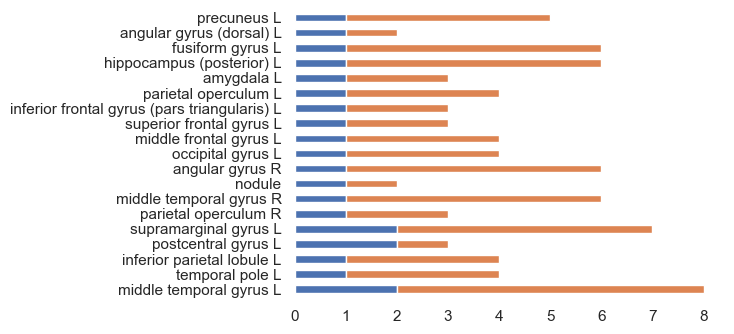

In [781]:
final = pd.DataFrame()
fig = plt.figure()
final['Sig Subject Count'] = sig_ct
final['Total Subject Count'] = nonsig_ct
final.index = list(sig_dict.keys())

ax = final.plot(kind='barh',stacked=True,grid=False,legend=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_edgecolor = None
plt.savefig('significance plot.png')
#fig.save('final chart.png')

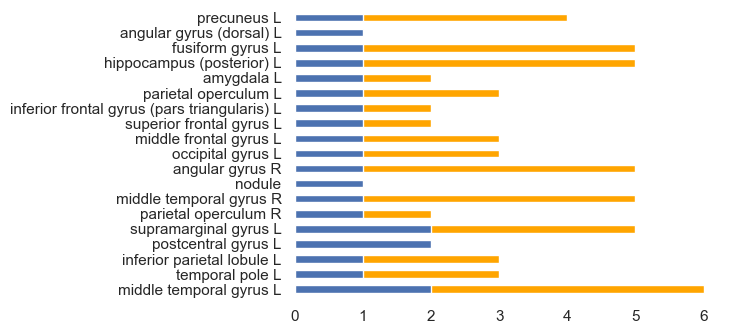

In [787]:
final = pd.DataFrame()
fig = plt.figure()
final['Sig Subject Count'] = sig_ct
final['Total Subject Count'] = nonsig_ct
final.index = list(sig_dict.keys())

ax = final['Total Subject Count'].plot(kind='barh',stacked=True,grid=False,legend=False, color='orange')
ax = final['Sig Subject Count'].plot(kind='barh',stacked=True,grid=False,legend=False)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_edgecolor = None
plt.savefig('significance plot.png')


In [687]:
nonsig_region_ct

middle temporal gyrus L                         55
middle temporal gyrus R                         31
fusiform gyrus L                                23
parietal operculum L                            20
angular gyrus R                                 18
middle frontal gyrus L                          17
temporal pole L                                 16
precuneus L                                     16
supramarginal gyrus L                           14
parietal operculum R                            14
occipital gyrus L                               12
hippocampus (posterior) L                       11
CZ                                               9
FZ                                               7
nodule                                           6
inferior frontal gyrus (pars triangularis) L     6
PZ                                               5
inferior parietal lobule L                       5
superior frontal gyrus L                         5
postcentral gyrus L            

In [782]:
final

,Sig Subject Count,Total Subject Count
middle temporal gyrus L,2,6
temporal pole L,1,3
inferior parietal lobule L,1,3
postcentral gyrus L,2,1
supramarginal gyrus L,2,5
parietal operculum R,1,2
middle temporal gyrus R,1,5
nodule,1,1
angular gyrus R,1,5
occipital gyrus L,1,3
